In [5]:
experiment_id="880375092"
path="/content/drive/MyDrive/NMA_Project/PreprocessedFiles_Novel"
#put the folder in PreprocessedFiles_Novel in your drive or change path into the shared NMA Project folder/PreprocessedFiles_Novel/

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 8.1 MB/s 


In [29]:
import numpy as np
import pandas as pd
import os
import pickle5 as pickle
import matplotlib.pyplot as plt

In [26]:
def load_aligned_data(experiment_id):
    """Load aligned data from pickles + npy files.
    Experiment_id: experiment id as a string
    Path: path to the folder with data (absolute path is safest)
    behavior_types: running_speed, pupil_diameter, lick_rate. If passive, no lick rate!
    """
    path="/content/drive/MyDrive/NMA_Project/PreprocessedFiles_Novel"
    behavior_types=['running_speed','pupil_diameter', 'lick_rate']
    data = None
    with open(os.path.join(path, f'ophys_aligned_neural_traces_{experiment_id}.p'), "rb") as fh:
      data = pickle.load(fh)

    neural_df = pd.DataFrame(data)
    neural_ts = np.load(os.path.join(path,f'ophys_aligned_neural_traces_timestamps_{experiment_id}.npy'))
    with open(os.path.join(path,f'ophys_aligned_behavior_traces_{experiment_id}.p'), "rb") as fh:
      data = pickle.load(fh)
    behavior_df = pd.DataFrame(data)
    behavior_ts_dict = {}
    for bt in behavior_types:
        try:
            behavior_ts_dict[bt] = np.load(os.path.join(path, f'ophys_aligned_behavior_{bt}_traces_timestamps_{experiment_id}.npy'))
        except FileNotFoundError as e:
            if bt == 'lick_rate': 
                warnings.warn(f'Lick rate not found for experiment {experiment_id}, assuming passive, continuing...')
            else:
                raise(e)
    return neural_df, neural_ts, behavior_df, behavior_ts_dict

In [20]:

aligned_neural_format,aligned_neural_ts_format,aligned_behavior_format,aligned_behavior_ts_format=load_aligned_data(experiment_id, path, behavior_types=['running_speed', 'pupil_diameter', 'lick_rate'])


In [27]:
ids = ["880375092","950833329"]
res = list(map(load_aligned_data,ids))

<Figure size 432x288 with 0 Axes>

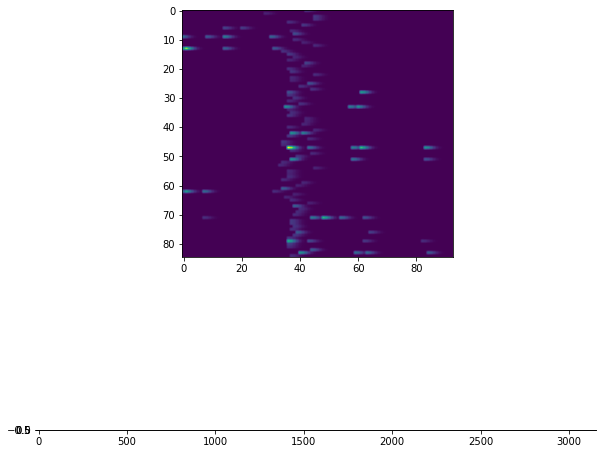

In [ ]:
plt.figure()
fig, axs = plt.subplots(len(ids), 1, figsize=(10,10))
for ind,x in enumerate(res):
    aligned_neural_format = x[0]
    aligned_neural_ts_format = x[1]
    aligned_behavior_format = x[2]
    aligned_behavior_ts_format = x[3]
    x_z = 0
    for i,a in enumerate(aligned_neural_ts_format):
        if a == 0:
            x_z = i
    
    stim_id = 0
    mean_res = 0.000
    traces = aligned_neural_format.query('stimulus_presentations_id == @stim_id and mean_response > @mean_res')
    raw = np.stack(traces['trace'].to_numpy())
    raw = raw*255
    
    test = raw

    axs[ind].imshow(test,cmap='gray')


plt.show()